<a href="https://colab.research.google.com/github/Arinjay11000/Minor-Projects/blob/main/Fake%20News%20Classifier/Fake_news_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import missingno as msn 
from imblearn.over_sampling import SMOTE

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
df.set_index("id",inplace=True)
df.head()

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


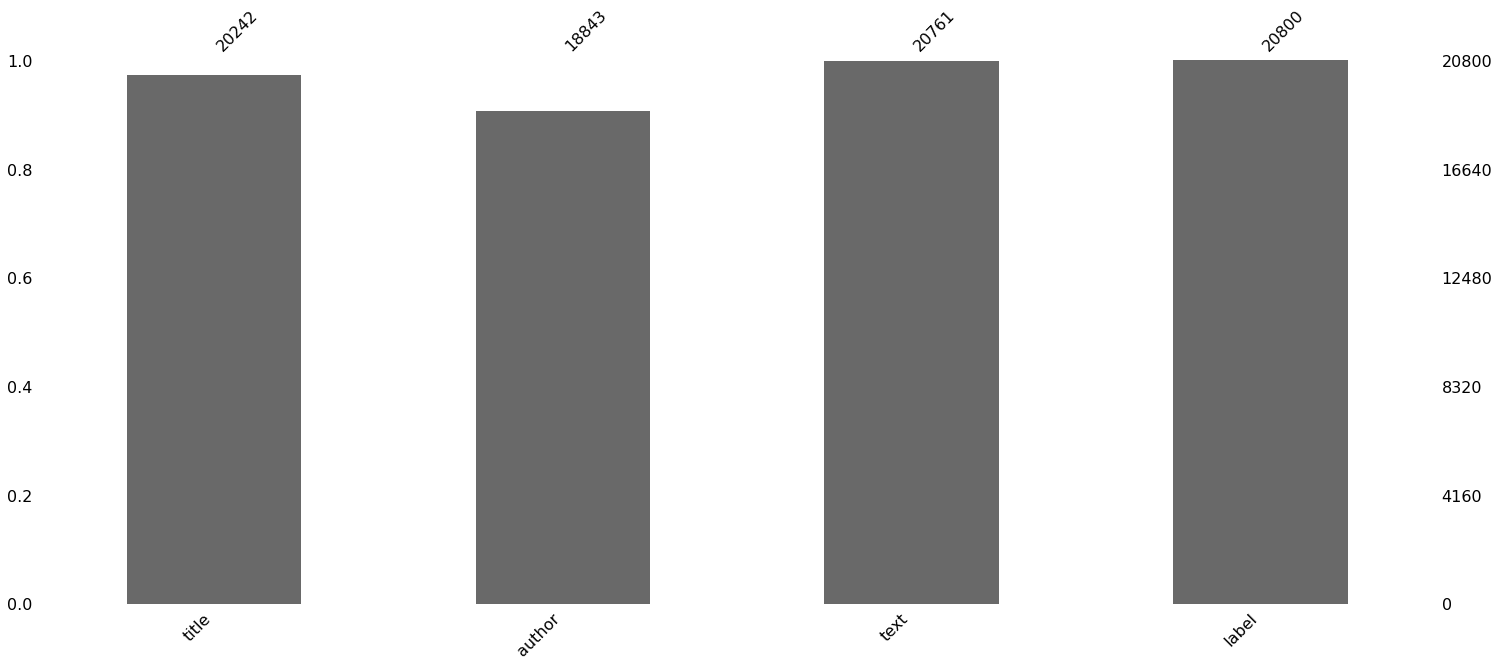

In [ ]:
msn.bar(df)

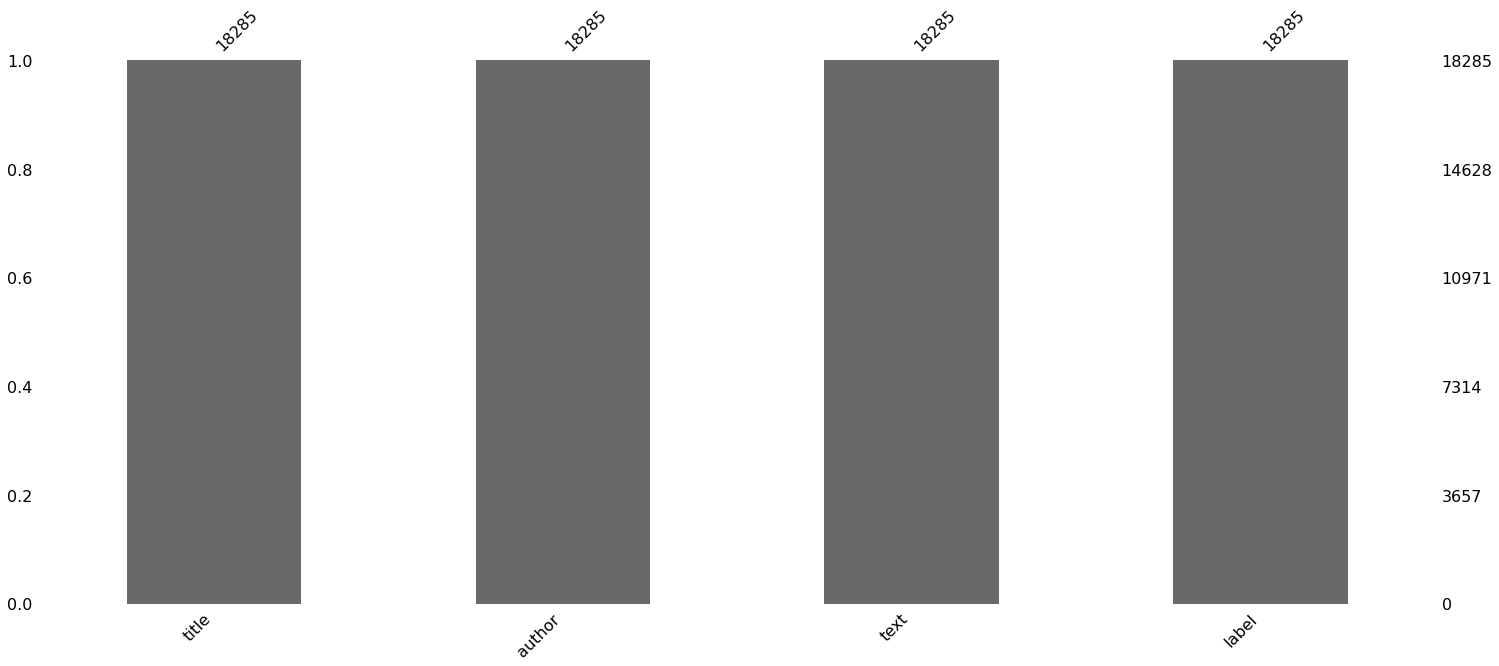

In [ ]:
df.dropna(inplace=True)
msn.bar(df)

In [ ]:
df["author"].nunique()

3838

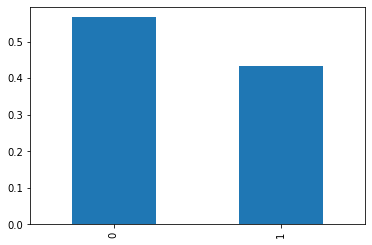

In [ ]:
df["label"].value_counts(normalize=True).plot(kind="bar")
plt.show()

In [ ]:
df.shape

(18285, 4)

In [ ]:
df.index=[i for i in range(18285)]
df.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df.tail()

,title,author,text,label
18280,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
18281,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
18282,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
18283,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
18284,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [ ]:
df["Merged"]=df["title"]+" "+df["author"]
df.head()

,title,author,text,label,Merged
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [ ]:
df.drop(["title","text","author"],axis=1,inplace=True)
df.head()

,label,Merged
0,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,1,Why the Truth Might Get You Fired Consortiumne...
3,1,15 Civilians Killed In Single US Airstrike Hav...
4,1,Iranian woman jailed for fictional unpublished...


In [ ]:
w=WordNetLemmatizer()
for i in range(len(df)):
  review=re.sub('[^a-zA-Z]', ' ', df["Merged"][i])
  review=review.lower()
  review=review.split()
  review=[w.lemmatize(word) for word in review if not word in set(stopwords.words("english"))]
  review=" ".join(review)
  df["Merged"][i]=review
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,label,Merged
0,1,house dem aide even see comey letter jason cha...
1,0,flynn hillary clinton big woman campus breitba...
2,1,truth might get fired consortiumnews com
3,1,civilian killed single u airstrike identified ...
4,1,iranian woman jailed fictional unpublished sto...


In [ ]:
cv = TfidfVectorizer(max_features=6000,ngram_range=(1,3))
X = cv.fit_transform(df["Merged"]).toarray()

In [ ]:
X.shape

(18285, 6000)

In [ ]:
Y=df["label"]
Y.shape

(18285,)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10,stratify=Y)
sm=SMOTE(random_state=0)
X_train_res,Y_train_res=sm.fit_resample(X_train,Y_train)
print(sum(Y_train_res==1))
print(sum(Y_train_res==0))

8289
8289


0.9876948318293683
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2072
           1       0.97      1.00      0.99      1585

    accuracy                           0.99      3657
   macro avg       0.99      0.99      0.99      3657
weighted avg       0.99      0.99      0.99      3657



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


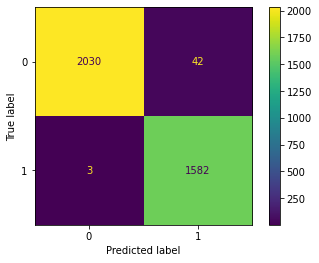

In [ ]:
model1=LogisticRegression()
model1.fit(X_train_res,Y_train_res)
Y_pred1=model1.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(classification_report(Y_test,Y_pred1))
plot_confusion_matrix(model1,X_test,Y_test)

0.7790538692917692
              precision    recall  f1-score   support

           0       1.00      0.61      0.76      2072
           1       0.66      1.00      0.80      1585

    accuracy                           0.78      3657
   macro avg       0.83      0.80      0.78      3657
weighted avg       0.85      0.78      0.77      3657



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


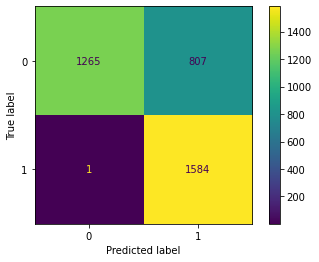

In [ ]:
model2=KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train_res,Y_train_res)
Y_pred2=model2.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(classification_report(Y_test,Y_pred2))
plot_confusion_matrix(model2,X_test,Y_test)

0.9928903472791906
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2072
           1       0.99      0.99      0.99      1585

    accuracy                           0.99      3657
   macro avg       0.99      0.99      0.99      3657
weighted avg       0.99      0.99      0.99      3657



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


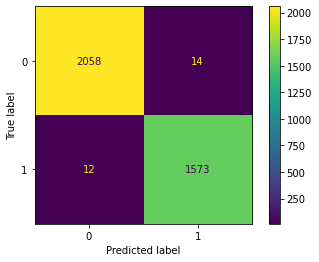

In [ ]:
model3=DecisionTreeClassifier()
model3.fit(X_train_res,Y_train_res)
Y_pred3=model3.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(classification_report(Y_test,Y_pred3))
plot_confusion_matrix(model3,X_test,Y_test)

0.9953513809133169
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2072
           1       0.99      1.00      0.99      1585

    accuracy                           1.00      3657
   macro avg       0.99      1.00      1.00      3657
weighted avg       1.00      1.00      1.00      3657



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


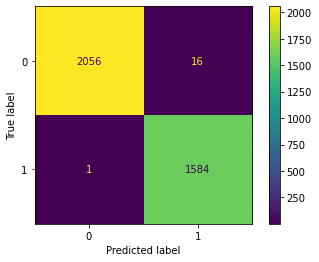

In [ ]:
model4=RandomForestClassifier()
model4.fit(X_train_res,Y_train_res)
Y_pred4=model4.predict(X_test)
print(accuracy_score(Y_test,Y_pred4))
print(classification_report(Y_test,Y_pred4))
plot_confusion_matrix(model4,X_test,Y_test)

0.9830462127426852
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2072
           1       0.99      0.97      0.98      1585

    accuracy                           0.98      3657
   macro avg       0.98      0.98      0.98      3657
weighted avg       0.98      0.98      0.98      3657



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


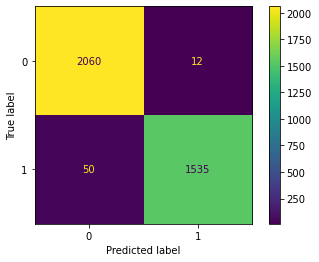

In [ ]:
model6=MultinomialNB()
model6.fit(X_train_res,Y_train_res)
Y_pred6=model6.predict(X_test)
print(accuracy_score(Y_test,Y_pred6))
print(classification_report(Y_test,Y_pred6))
plot_confusion_matrix(model6,X_test,Y_test)